<a href="https://colab.research.google.com/github/lioAbdo/Machine-Learning/blob/master/Regression_polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Régression polynomial**    > cad Régression non linéaire


In [0]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

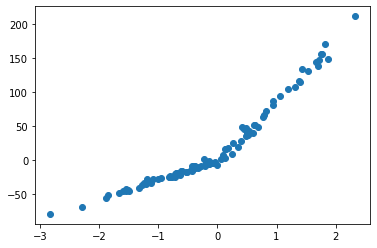

In [0]:
(x,y) = make_regression(n_samples=100, n_features=1, noise=5)
y=y+abs(y/2)
plt.scatter(x,y)

In [0]:
 #Verifier toujours les dimensions
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [0]:
#matrice X
X=np.hstack((x, np.ones(x.shape)))
X=np.hstack((x**2, X))
X

array([[ 6.25603870e-01,  7.90951244e-01,  1.00000000e+00],
       [ 6.74533959e-01, -8.21300164e-01,  1.00000000e+00],
       [ 1.99724737e-02, -1.41324002e-01,  1.00000000e+00],
       [ 1.62480285e-01, -4.03088434e-01,  1.00000000e+00],
       [ 1.86805211e-02, -1.36676703e-01,  1.00000000e+00],
       [ 3.95239786e-01, -6.28680989e-01,  1.00000000e+00],
       [ 4.13409079e-01,  6.42968957e-01,  1.00000000e+00],
       [ 8.85189178e-01,  9.40844928e-01,  1.00000000e+00],
       [ 3.54616485e-01, -5.95496838e-01,  1.00000000e+00],
       [ 2.34289293e+00,  1.53065115e+00,  1.00000000e+00],
       [ 3.04482957e+00,  1.74494400e+00,  1.00000000e+00],
       [ 2.82999485e-01, -5.31976959e-01,  1.00000000e+00],
       [ 1.79873044e-01,  4.24114423e-01,  1.00000000e+00],
       [ 1.65162992e-02,  1.28515755e-01,  1.00000000e+00],
       [ 8.38376792e-03,  9.15629178e-02,  1.00000000e+00],
       [ 3.63321097e-01,  6.02761227e-01,  1.00000000e+00],
       [ 1.45677792e-03, -3.81677602e-02

In [0]:
#initialiser theta
theta=np.random.randn(3,1)
theta
theta.shape

(3, 1)

##**Modèle**

In [0]:
# h(theta)
def model(X, theta):
  return X.dot(theta)  #c le produit matriciel, et c l'équivalent de 'ax+b'

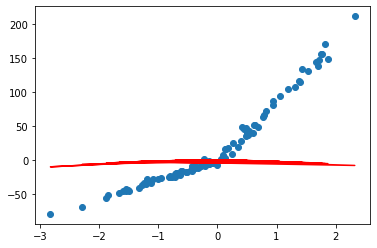

In [0]:
#afficher notre modèle
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')

##**Cost function**

In [0]:
def cost_fct(X,y,theta):
  m=len(y)
  return 1/(2*m) * np.sum((model(X,theta)-y)**2)

cost_fct(X,y,theta)

2064.7202433874213

In [0]:
def grad(X,y,theta):
  m=len(y)
  return 1/m * X.T.dot(model(X,theta)-y) # X.T multiplié par h(theta)-y

In [0]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
  cost_history=np.zeros(n_iterations)
  for i in range(n_iterations):
    theta = theta - learning_rate * grad(X,y,theta)
    cost_history[i]=cost_fct(X,y,theta)
  return theta, cost_history

##**ML!**

In [0]:
theta_final, cost_history = gradient_descent(X,y, theta, learning_rate=0.001, n_iterations=10000)
print(theta_final)
print('-'*10 + 'here is the cost function history')
cost_history

[[12.59453567]
 [57.70843536]
 [10.11989938]]
----------here is the cost function history


array([2059.42553668, 2054.14925707, 2048.89131492, ...,   25.40691603,
         25.40691586,   25.4069157 ])

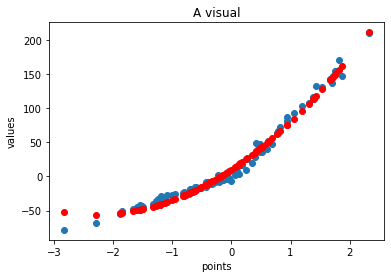

In [0]:
predictions=model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions, c='r')
plt.xlabel('points')
plt.ylabel('values')
plt.title('A visual')
plt.show()

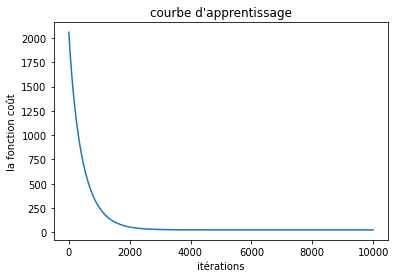

In [0]:

plt.plot(range(10000), cost_history)
plt.xlabel('itérations')
plt.ylabel('la fonction coût')
plt.title("courbe d'apprentissage")
plt.show()

In [0]:
# Calcul du coeffeicient R2 de détermination (montrer la réelle performance de notre modèle)

def coef_determination(y, pred):    # pred : nos prédictions
  u= ((y-pred)**2).sum() #le résidu de la somme des carrés des différences (diff entre nos vraies valeurs prédites par le modèle)
  v= ((y-y.mean())**2).sum() # (variance)
  return 1- u/v
coef_determination(y, predictions)

0.9862214008512151